In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/parsed_data.csv")

In [4]:
df.head()

,wallet,network,protocol,action,amount_raw,asset,asset_price_usd,user_id,to_id,no_token
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,deposit,2.000000e+09,USDC,0.993832,0x00000000001accfa9cef68cf5371a23025b6d4b6,NaN,2000.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,deposit,1.450000e+20,WMATIC,1.970307,0x000000000051d07a4fb3bd10121a343d85818da6,NaN,145.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,deposit,1.000000e+15,WMATIC,0.922377,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.001000
3,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,deposit,4.000000e+15,WMATIC,1.057483,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.004000
4,0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,redeemunderlying,5.015480e+05,USDC,1.002130,0x7f90122bf0700f9e7e1f688fe926940e8839f353,0x0000000000e189dd664b9ab08a33c4839953852c,0.501548


### Analysing Categorical columns

In [5]:
cat_cols = df.select_dtypes("object").columns
cat_cols = cat_cols.delete([0,-1])
cat_cols

Index(['network', 'protocol', 'action', 'asset', 'user_id'], dtype='object')

In [6]:
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

network: ['polygon']
protocol: ['aave_v2']
action: ['deposit' 'redeemunderlying' 'borrow' 'repay' 'liquidationcall']
asset: ['USDC' 'WMATIC' 'DAI' 'WBTC' 'WETH' 'USDT' 'WPOL' 'AAVE' nan]
user_id: ['0x00000000001accfa9cef68cf5371a23025b6d4b6'
 '0x000000000051d07a4fb3bd10121a343d85818da6'
 '0x000000000096026fb41fc39f9875d164bd82e2dc' ...
 '0x0618c450370822c5cb25ec143a3008230d8e2c12'
 '0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2'
 '0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a']


In [7]:
df2 = df.drop(["network", "protocol"], axis="columns")
df2.head()

,wallet,action,amount_raw,asset,asset_price_usd,user_id,to_id,no_token
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,deposit,2.000000e+09,USDC,0.993832,0x00000000001accfa9cef68cf5371a23025b6d4b6,NaN,2000.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,deposit,1.450000e+20,WMATIC,1.970307,0x000000000051d07a4fb3bd10121a343d85818da6,NaN,145.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,1.000000e+15,WMATIC,0.922377,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.001000
3,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,4.000000e+15,WMATIC,1.057483,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.004000
4,0x0000000000e189dd664b9ab08a33c4839953852c,redeemunderlying,5.015480e+05,USDC,1.002130,0x7f90122bf0700f9e7e1f688fe926940e8839f353,0x0000000000e189dd664b9ab08a33c4839953852c,0.501548


In [8]:
df2.isna().sum()

wallet                 0
action                 0
amount_raw             0
asset                248
asset_price_usd        0
user_id                0
to_id              67695
no_token               0
dtype: int64

In [9]:
df2["asset"] = df2["asset"].fillna("")

In [10]:
#checking for null values in the assests column
df2[df2["asset"]==""]["action"].unique()

array(['liquidationcall'], dtype=object)

In [11]:
df2.head()

,wallet,action,amount_raw,asset,asset_price_usd,user_id,to_id,no_token
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,deposit,2.000000e+09,USDC,0.993832,0x00000000001accfa9cef68cf5371a23025b6d4b6,NaN,2000.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,deposit,1.450000e+20,WMATIC,1.970307,0x000000000051d07a4fb3bd10121a343d85818da6,NaN,145.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,1.000000e+15,WMATIC,0.922377,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.001000
3,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,4.000000e+15,WMATIC,1.057483,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.004000
4,0x0000000000e189dd664b9ab08a33c4839953852c,redeemunderlying,5.015480e+05,USDC,1.002130,0x7f90122bf0700f9e7e1f688fe926940e8839f353,0x0000000000e189dd664b9ab08a33c4839953852c,0.501548


In [12]:
df2.describe()

,amount_raw,asset_price_usd,no_token
count,1.000000e+05,100000.000000,1.000000e+05
mean,6.544795e+21,1997.901165,1.379018e+04
std,1.264935e+23,8166.822331,1.560431e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,2.347008e+08,0.999311,3.996434e+00
50%,5.204440e+11,1.003320,8.500000e+01
75%,2.499973e+19,1.474938,1.380781e+03
max,1.273000e+25,64664.127500,1.273000e+07


In [13]:
df2["total_price_usd"] = df2["asset_price_usd"] * df2["no_token"] 

In [14]:
df2.head()

,wallet,action,amount_raw,asset,asset_price_usd,user_id,to_id,no_token,total_price_usd
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,deposit,2.000000e+09,USDC,0.993832,0x00000000001accfa9cef68cf5371a23025b6d4b6,NaN,2000.000000,1987.663655
1,0x000000000051d07a4fb3bd10121a343d85818da6,deposit,1.450000e+20,WMATIC,1.970307,0x000000000051d07a4fb3bd10121a343d85818da6,NaN,145.000000,285.694480
2,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,1.000000e+15,WMATIC,0.922377,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.001000,0.000922
3,0x000000000096026fb41fc39f9875d164bd82e2dc,deposit,4.000000e+15,WMATIC,1.057483,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,0.004000,0.004230
4,0x0000000000e189dd664b9ab08a33c4839953852c,redeemunderlying,5.015480e+05,USDC,1.002130,0x7f90122bf0700f9e7e1f688fe926940e8839f353,0x0000000000e189dd664b9ab08a33c4839953852c,0.501548,0.502616


In [15]:
df2["total_price_usd"].describe()

count    1.000000e+05
mean     1.987155e+04
std      1.940125e+05
min      0.000000e+00
25%      2.525800e+01
50%      2.680149e+02
75%      3.149149e+03
max      1.335325e+07
Name: total_price_usd, dtype: float64

#### Outlier Detection

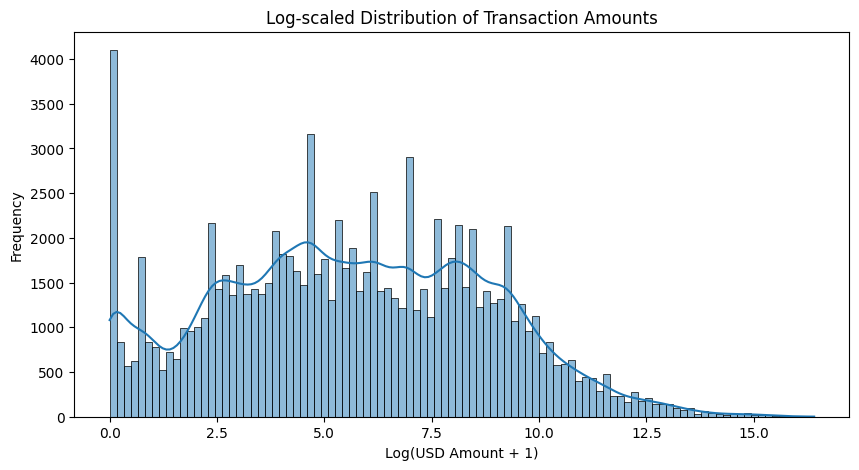

In [16]:
import numpy as np

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df2["total_price_usd"]), bins=100,kde=True)
plt.title("Log-scaled Distribution of Transaction Amounts")
plt.xlabel("Log(USD Amount + 1)")
plt.ylabel("Frequency")
plt.show()


In [17]:
df2.sort_values("total_price_usd", ascending=False).head(10)


,wallet,action,amount_raw,asset,asset_price_usd,user_id,to_id,no_token,total_price_usd
58778,0x0459dda9eb7062e6fdca6293a4c363722fca6102,redeemunderlying,2.848416e+10,WBTC,46879.566012,0xc2d95eef97ec6c17551d45e77b590dc1f9117c67,0x0459dda9eb7062e6fdca6293a4c363722fca6102,2.848416e+02,1.335325e+07
4470,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,borrow,1.273000e+25,DAI,1.000963,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,NaN,1.273000e+07,1.274226e+07
4471,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,deposit,1.273000e+25,DAI,1.000963,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,NaN,1.273000e+07,1.274226e+07
4464,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,repay,1.000000e+25,DAI,0.999027,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,NaN,1.000000e+07,9.990265e+06
4465,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,redeemunderlying,1.000000e+25,DAI,0.999027,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,0x0034baeeb160a5f1032b6d124d3e87cc94d74e62,1.000000e+07,9.990265e+06
48307,0x035e72ef297547349d8ce3573ebb8e10dc639816,borrow,3.500000e+21,WETH,2370.586690,0x035e72ef297547349d8ce3573ebb8e10dc639816,NaN,3.500000e+03,8.297053e+06
48309,0x035e72ef297547349d8ce3573ebb8e10dc639816,deposit,3.500000e+21,WETH,2370.586690,0x035e72ef297547349d8ce3573ebb8e10dc639816,NaN,3.500000e+03,8.297053e+06
32781,0x0233760ac2ae6fa40dc3864ea95f7721cae8ed2d,redeemunderlying,3.248926e+21,WETH,2155.589150,0x0233760ac2ae6fa40dc3864ea95f7721cae8ed2d,0x0233760ac2ae6fa40dc3864ea95f7721cae8ed2d,3.248926e+03,7.003349e+06
32782,0x0233760ac2ae6fa40dc3864ea95f7721cae8ed2d,deposit,3.248926e+21,WETH,2155.589150,0x0233760ac2ae6fa40dc3864ea95f7721cae8ed2d,NaN,3.248926e+03,7.003349e+06
2303,0x000f7f22bfc28d940d4b68e13213ab17cf107790,redeemunderlying,7.000000e+12,USDC,0.997541,0x000f7f22bfc28d940d4b68e13213ab17cf107790,0x000f7f22bfc28d940d4b68e13213ab17cf107790,7.000000e+06,6.982789e+06


In [18]:
df2["total_price_usd"].quantile(0.995)

np.float64(660118.7788089542)

In [19]:
# df2 = df2[df2["total_price_usd"] < 660119]

### Feature Engineering

In [20]:
user_features = df2.groupby("wallet").agg(
    total_deposit_usd=("total_price_usd", lambda x: x[df2.loc[x.index, "action"] == "deposit"].sum()),
    total_borrow_usd=("total_price_usd", lambda x: x[df2.loc[x.index, "action"] == "borrow"].sum()),
    total_repay_usd=("total_price_usd", lambda x: x[df2.loc[x.index, "action"] == "repay"].sum()),
    total_withdraw_usd=("total_price_usd", lambda x: x[df2.loc[x.index, "action"] == "redeemunderlying"].sum()),

    count_deposit=("action", lambda x: (x == "deposit").sum()),
    count_borrow=("action", lambda x: (x == "borrow").sum()),
    count_repay=("action", lambda x: (x == "repay").sum()),
    count_withdraw=("action", lambda x: (x == "redeemunderlying").sum()),
    count_liquidation=("action", lambda x: (x == "liquidationcall").sum()),
)


In [21]:
user_features = user_features.reset_index().drop("wallet", axis="columns")
user_features

,total_deposit_usd,total_borrow_usd,total_repay_usd,total_withdraw_usd,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation
0,1987.663655,0.000000e+00,0.000000,0.000000,1,0,0,0,0
1,285.694480,0.000000e+00,0.000000,0.000000,1,0,0,0,0
2,0.005152,0.000000e+00,0.000000,0.000000,2,0,0,0,0
3,0.000000,0.000000e+00,0.000000,1960.722952,0,0,0,17,0
4,925490.696960,1.303558e+05,70150.263791,824037.577815,250,15,4,130,0
...,...,...,...,...,...,...,...,...,...
3492,0.000099,0.000000e+00,0.000000,0.000000,1,0,0,0,0
3493,22.642876,2.330736e+00,0.000000,16.046172,4,1,0,2,0
3494,35309.766244,0.000000e+00,0.000000,70586.392081,1,0,0,4,0
3495,6813.240971,1.202218e+03,199.896161,812.649923,13,2,2,5,0


In [22]:
user_features.describe(percentiles=[0.25, 0.5,0.75, 0.99])

,total_deposit_usd,total_borrow_usd,total_repay_usd,total_withdraw_usd,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation
count,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,1.754967e+05,1.175732e+05,8.891131e+04,1.862643e+05,10.811553,4.885902,3.589648,9.237918,0.070918
std,2.179518e+06,1.479900e+06,1.187504e+06,2.069756e+06,29.868997,15.133573,13.374770,242.518307,0.692889
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.061817e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.803163e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000
75%,4.056299e+03,8.997755e+02,4.575458e+02,3.330974e+03,6.000000,3.000000,2.000000,3.000000,0.000000
99%,3.175595e+06,2.219194e+06,1.739401e+06,3.397832e+06,137.080000,64.000000,66.040000,74.080000,2.000000
max,6.167728e+07,4.703976e+07,4.690745e+07,6.058051e+07,511.000000,200.000000,291.000000,14265.000000,26.000000


In [23]:
user_features['avg_deposit'] = user_features['total_deposit_usd'] / (user_features['count_deposit'] + 1e-6)
user_features['avg_borrow'] = user_features['total_borrow_usd'] / (user_features['count_borrow'] + 1e-6)
user_features['avg_repay'] = user_features['total_repay_usd'] / (user_features['count_repay'] + 1e-6)
user_features['avg_withdraw'] = user_features['total_withdraw_usd'] / (user_features['count_withdraw'] + 1e-6)

In [24]:
user_features.head()

,total_deposit_usd,total_borrow_usd,total_repay_usd,total_withdraw_usd,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation,avg_deposit,avg_borrow,avg_repay,avg_withdraw
0,1987.663655,0.000000,0.000000,0.000000,1,0,0,0,0,1987.661667,0.000000,0.000000,0.000000
1,285.694480,0.000000,0.000000,0.000000,1,0,0,0,0,285.694195,0.000000,0.000000,0.000000
2,0.005152,0.000000,0.000000,0.000000,2,0,0,0,0,0.002576,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1960.722952,0,0,0,17,0,0.000000,0.000000,0.000000,115.336637
4,925490.696960,130355.754756,70150.263791,824037.577815,250,15,4,130,0,3701.962773,8690.383071,17537.561563,6338.750550


In [25]:
user_features["withdraw_to_depo"] = user_features["total_withdraw_usd"]/(user_features["total_deposit_usd"]+1e-6)

In [26]:
user_features["withdraw_to_depo"].describe(percentiles=[0.25, 0.5, 0.75, 0.95])

count    3.497000e+03
mean     2.830421e+10
std      7.304082e+11
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.911652e-01
95%      1.365934e+03
max      3.636795e+13
Name: withdraw_to_depo, dtype: float64

In [27]:
# Create new ratio features
user_features["withdraw_to_depo"] = user_features["total_withdraw_usd"] / (user_features["total_deposit_usd"]+1e-6)
user_features["borrow_to_deposit"] = user_features["total_borrow_usd"] / (user_features["total_deposit_usd"]+1e-6)
user_features["repay_to_borrow"] = user_features["total_repay_usd"] / (user_features["total_borrow_usd"]+1e-6)


In [28]:
user_features[["withdraw_to_depo", "borrow_to_deposit", "repay_to_borrow"]].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,withdraw_to_depo,borrow_to_deposit,repay_to_borrow
count,3.497000e+03,3.497000e+03,3.497000e+03
mean,2.830421e+10,1.425938e+09,2.228613e+06
std,7.304082e+11,5.276915e+10,1.317760e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.911652e-01,4.083530e-01,6.584248e-01
95%,1.365934e+03,8.691382e-01,1.004281e+00
99%,8.612279e+10,1.108247e+01,1.618884e+00
max,3.636795e+13,2.914553e+12,7.792635e+09


In [29]:
ratioo = ["withdraw_to_depo","borrow_to_deposit","repay_to_borrow"]
for feature in ratioo:
    threshold = user_features[feature].quantile(0.98)
    user_features[feature] = user_features[feature].apply(lambda x: threshold if x > threshold else x)
    print(f"{feature}: {threshold}")


withdraw_to_depo: 11842375103.207817
borrow_to_deposit: 1.4620350375282247
repay_to_borrow: 1.0634957219096224


In [30]:
user_features.describe()

,total_deposit_usd,total_borrow_usd,total_repay_usd,total_withdraw_usd,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation,avg_deposit,avg_borrow,avg_repay,avg_withdraw,withdraw_to_depo,borrow_to_deposit,repay_to_borrow
count,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000
mean,1.754967e+05,1.175732e+05,8.891131e+04,1.862643e+05,10.811553,4.885902,3.589648,9.237918,0.070918,8.034116e+03,6.984880e+03,7.882276e+03,1.437140e+04,3.203097e+08,0.228559,0.273224
std,2.179518e+06,1.479900e+06,1.187504e+06,2.069756e+06,29.868997,15.133573,13.374770,242.518307,0.692889,8.581802e+04,8.516699e+04,1.077373e+05,1.323447e+05,1.816600e+09,0.336488,0.416764
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.061817e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,1.010963e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,4.803163e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,1.567870e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,4.056299e+03,8.997755e+02,4.575458e+02,3.330974e+03,6.000000,3.000000,2.000000,3.000000,0.000000,7.771156e+02,2.681911e+02,1.152990e+02,9.379144e+02,9.911652e-01,0.408353,0.658425
max,6.167728e+07,4.703976e+07,4.690745e+07,6.058051e+07,511.000000,200.000000,291.000000,14265.000000,26.000000,2.610639e+06,2.914550e+06,3.608265e+06,3.822733e+06,1.184238e+10,1.462035,1.063496


In [31]:
user_features.sample(5)

,total_deposit_usd,total_borrow_usd,total_repay_usd,total_withdraw_usd,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation,avg_deposit,avg_borrow,avg_repay,avg_withdraw,withdraw_to_depo,borrow_to_deposit,repay_to_borrow
1868,3876.234770,1203.080572,1199.642324,6389.522389,10,4,2,21,0,387.623438,300.770068,599.820862,304.262956,1.648384e+00,0.310374,0.997142
139,0.000000,0.000000,0.000000,323654.208284,0,0,0,5,0,0.000000,0.000000,0.000000,64730.828711,1.184238e+10,0.000000,0.000000
2411,1.031438,0.000000,0.000000,0.000000,1,0,0,0,0,1.031437,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
461,1.188622,0.000000,0.000000,0.000000,1,0,0,0,0,1.188621,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
354,428.275879,0.000000,0.000000,0.000000,2,0,0,0,0,214.137833,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


In [32]:
features_to_drop = [
    "total_deposit_usd",
    "total_withdraw_usd",
    "total_borrow_usd",
    "total_repay_usd"
]

In [33]:
df_users = user_features.drop(features_to_drop, axis="columns")

In [34]:
df_users

,count_deposit,count_borrow,count_repay,count_withdraw,count_liquidation,avg_deposit,avg_borrow,avg_repay,avg_withdraw,withdraw_to_depo,borrow_to_deposit,repay_to_borrow
0,1,0,0,0,0,1987.661667,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,1,0,0,0,0,285.694195,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2,2,0,0,0,0,0.002576,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3,0,0,0,17,0,0.000000,0.000000,0.000000,115.336637,1.960723e+09,0.000000,0.000000
4,250,15,4,130,0,3701.962773,8690.383071,17537.561563,6338.750550,8.903791e-01,0.140850,0.538145
...,...,...,...,...,...,...,...,...,...,...,...,...
3492,1,0,0,0,0,0.000099,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
3493,4,1,0,2,0,5.660717,2.330733,0.000000,8.023082,7.086631e-01,0.102935,0.000000
3494,1,0,0,4,0,35309.730934,0.000000,0.000000,17646.593608,1.999061e+00,0.000000,0.000000
3495,13,2,2,5,0,524.095419,601.108680,99.948030,162.529952,1.192751e-01,0.176453,0.166273


In [35]:
df_users.to_csv("datasets\\user_data.csv", index=False)